SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


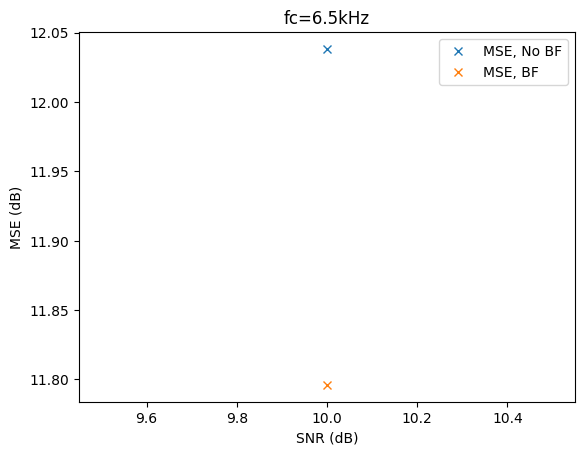

In [1]:
from bf_multichannel_const import bf_multichannel_const
import numpy as np
import matplotlib.pyplot as plt
from downlink import downlink

fc = 6.5e3
"""
My_bf = bf_multichannel_const(6.5e3, 2, 5,1)
# rx at (0,0)
# tx_1 at (5,5) with a wall at x=10
# after relection, tx_2 at (15,5)
My_bf.reflection_list = np.array([1,0.5])
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])

My_bf.simulation()

# plt mean square error
print(My_bf.mean_mse)
plt.figure()
plt.plot(My_bf.snr_list, My_bf.mean_mse, 'o')
plt.xlabel('SNR(dB)')
plt.ylabel('mse(dB)')
plt.title(f'fc={My_bf.fc/1000:.1f}kHz')
plt.show()

symbolset = My_bf.mean_symbols[-1,:]
true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))

fig,ax = plt.subplots()
ax.scatter(np.real(symbolset), np.imag(symbolset), c='r')
ax.scatter(np.real(true_sym), np.imag(true_sym), c='b')
ax.legend(['Received Uplink Signal','16QAM Constellation Points'])
ax.set_ylim(-4, 4)
ax.set_xlim(-4,4)
ax.set_title("Constellation Diagram for SNR=15dB")
plt.show()
"""

theta_bf = np.pi/2 #pos 45 degree angle?

My_ue_nobf = downlink(6.5e3, 1, 1, theta=theta_bf, apply_bf=False)
# do not assume independence
My_ue_nobf.reflection_list = np.array([1,0.5]) # this shouldn't play a part
#My_ue.x_tx_list = np.array([5,15]) #shouldn't need to touch gnb location
#My_ue.y_tx_list = np.array([5,5]) #shouldn't need to touch gnb location
#My_bf.reflection_list = np.array([1,0.5])
My_ue_nobf.x_rx_list = np.array([5,15])
My_ue_nobf.y_rx_list = np.array([5,5])
My_ue_nobf.simulation()
mse_no_bf = My_ue_nobf.mean_mse
symbolset_no_bf = My_ue_nobf.mean_symbols[-1,:]

true_sym = np.reshape(np.tile(np.arange(-3,4,2),4),(4,4)) + 1j*np.reshape(np.repeat(np.arange(3,-4,-2),4),(4,4))
My_ue = downlink(6.5e3, 1, 1, theta=theta_bf, apply_bf=True)
My_ue.simulation()
symbolset_bf = My_ue.mean_symbols[-1,:]
mse_bf =  My_ue.mean_mse

plt.figure()
plt.plot(My_ue_nobf.snr_list, mse_no_bf[:], 'x')
plt.plot(My_ue.snr_list, mse_bf[:], 'x')
plt.legend(['MSE, No BF', 'MSE, BF'])
plt.xlabel('SNR (dB)')
plt.ylabel('MSE (dB)')
plt.title(f'fc={fc/1000:.1f}kHz')
plt.show()